In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

In [26]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [27]:
titanic_df = pd.read_excel('titanic.xls', 'titanic', index_col=None, na_values=['NA'])

In [28]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [29]:
titanic_df['Survived'].mean()

0.3855693348365276

In [30]:
titanic_df.groupby('Pclass').mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


In [31]:
class_sex_grouping = titanic_df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

Survived        Age  Siblings/Spouses Aboard  \
Pclass Sex                                                    
1      female  0.968085  35.255319                 0.553191   
       male    0.368852  41.511639                 0.311475   
2      female  0.921053  28.980263                 0.486842   
       male    0.157407  30.493796                 0.342593   
3      female  0.500000  22.135417                 0.895833   
       male    0.137026  26.470612                 0.504373   

               Parents/Children Aboard        Fare  
Pclass Sex                                          
1      female                 0.457447  106.125798  
       male                   0.278689   67.226127  
2      female                 0.605263   21.970121  
       male                   0.222222   19.741782  
3      female                 0.798611   16.118810  
       male                   0.227405   12.695466

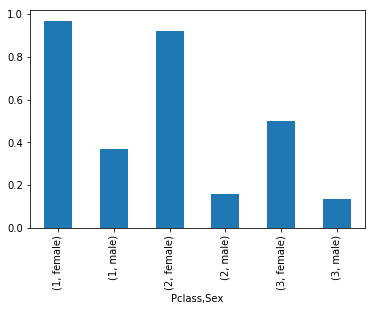

In [32]:
class_sex_grouping['Survived'].plot.bar()


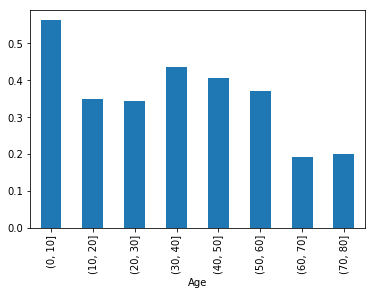

In [33]:
group_by_age = pd.cut(titanic_df["Age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [34]:
titanic_df.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [35]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

In [36]:
processed_df = preprocess_titanic_df(titanic_df)

AttributeError: 'DataFrame' object has no attribute 'sex'

In [20]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

NameError: name 'processed_df' is not defined